# Visualización del análisis de regresión multiple

En la anterior clase hicimos 5 modelos para poder obtener el peso de un pingüino dadas sus características:
- Longitud de alas.
- Profundidad de pico
- Sexo.        

Entre otras

In [1]:
# Importando librerías 
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de las gráficas

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Datos Preprocesados

In [3]:
preprocessed_penguins_df = pd.read_csv('dataset/penguins.csv').dropna()

### Modelos

In [5]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=preprocessed_penguins_df
    )
    .fit()
)

In [7]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=preprocessed_penguins_df
    )
    .fit()
)

In [8]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data=preprocessed_penguins_df
    )
    .fit()
)

In [9]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data=preprocessed_penguins_df
    )
    .fit()
)

In [10]:
model_5 = (
    smf.ols(
    formula ='body_mass_g ~ flipper_length_mm + C(sex)',
    data = preprocessed_penguins_df
    )
.fit()
)

Lo que haremos es comparar la obtención de los resultados de los modelos y los datos reales.

### Creación de tabla de resultados

In [11]:
resultado_modelos = pd.DataFrame(
    dict(
        actual_value = preprocessed_penguins_df.body_mass_g,
        prediction_model1 = model_1.predict(),
        prediction_model2 = model_2.predict(),
        prediction_model3 = model_3.predict(),
        prediction_model4 = model_4.predict(),
        prediction_model5 = model_5.predict(),
        species = preprocessed_penguins_df.species,
        sex = preprocessed_penguins_df.sex
    )
)
resultado_modelos

,actual_value,prediction_model1,prediction_model2,prediction_model3,prediction_model4,prediction_model5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4803.806832,Chinstrap,male


En Deepnote tenemos la ventaja de que los data frame arrojan una previsualización del histograma de la variable. 

In [14]:
for columna in resultado_modelos.columns:
    print(columna)

actual_value
prediction_model1
prediction_model2
prediction_model3
prediction_model4
prediction_model5
species
sex


### Comparación 1

<AxesSubplot: xlabel='actual_value', ylabel='Count'>

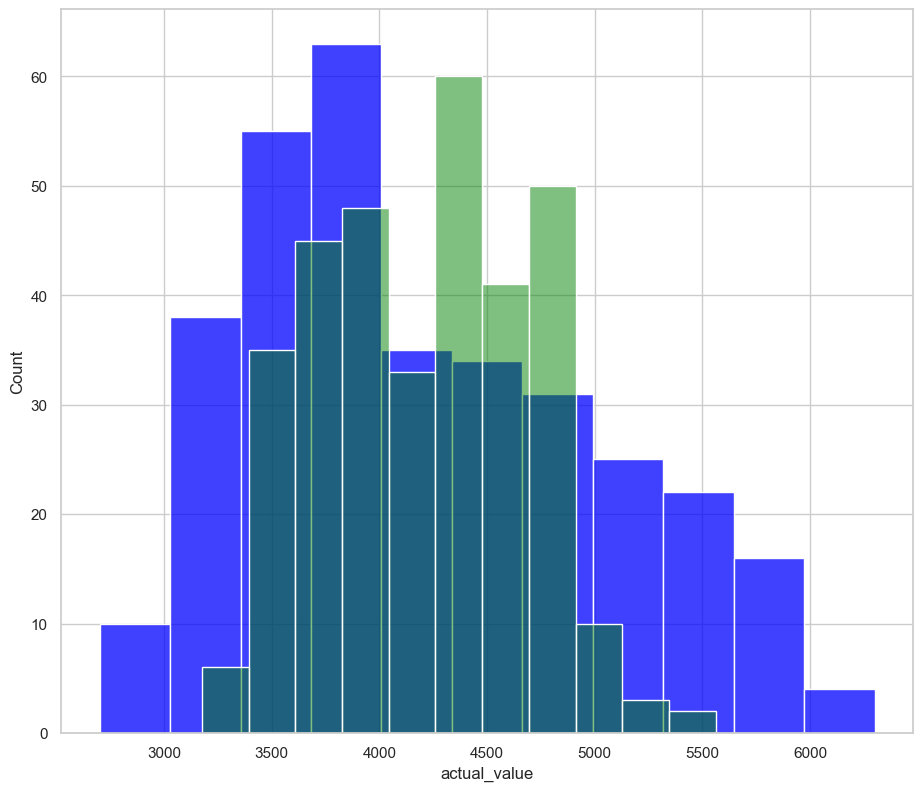

In [15]:
# Valores reales
sns.histplot(
    data = resultado_modelos,
    x='actual_value',
    color = 'blue'
)

#Modelo 1
sns.histplot(
    data = resultado_modelos,
    x='prediction_model1',
    color = 'green',
    alpha = 0.5
)


### Comparación 2

<AxesSubplot: xlabel='actual_value', ylabel='Count'>

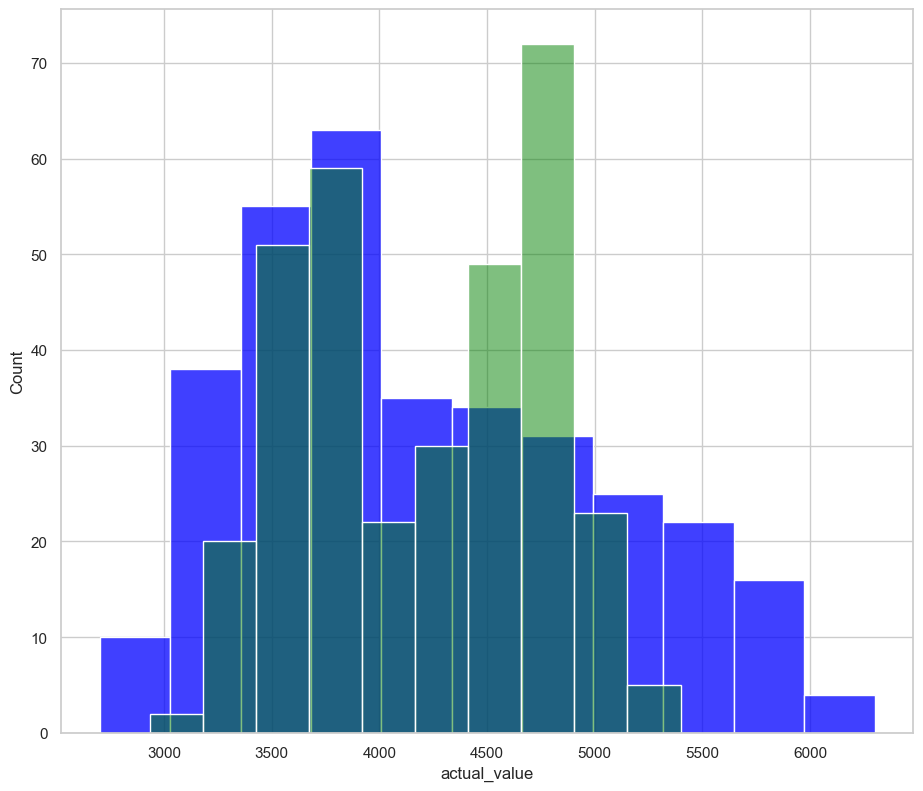

In [16]:
# Valores reales
sns.histplot(
    data = resultado_modelos,
    x='actual_value',
    color = 'blue'
)

#Modelo 1
sns.histplot(
    data = resultado_modelos,
    x='prediction_model2',
    color = 'green',
    alpha = 0.5
)


### Comparación 3

<AxesSubplot: xlabel='actual_value', ylabel='Count'>

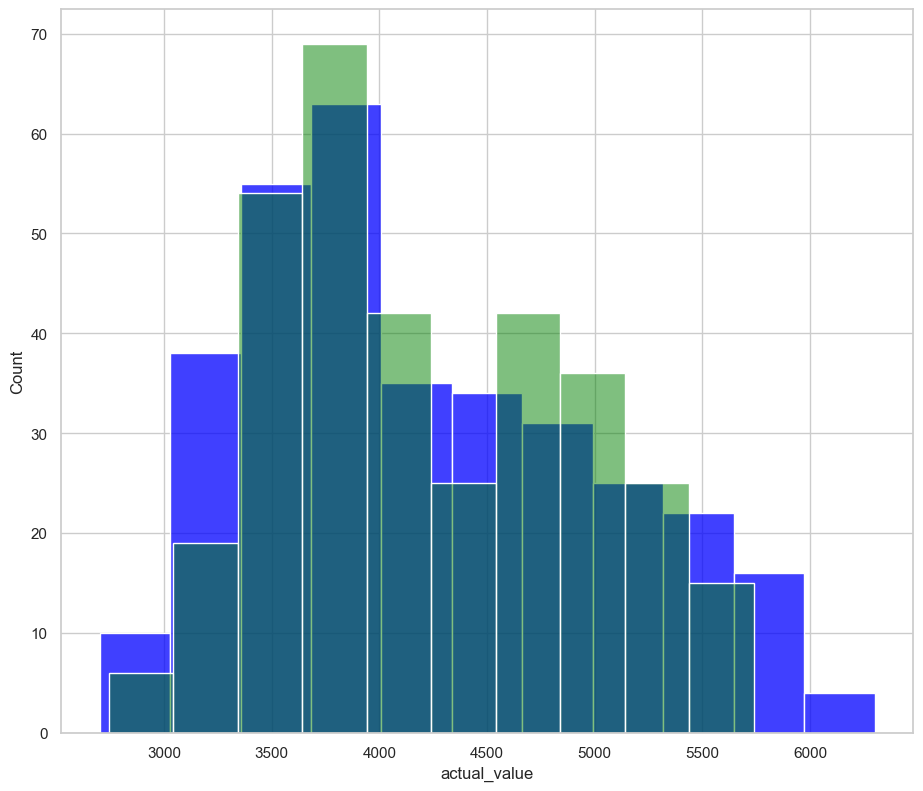

In [17]:
# Valores reales
sns.histplot(
    data = resultado_modelos,
    x='actual_value',
    color = 'blue'
)

#Modelo 1
sns.histplot(
    data = resultado_modelos,
    x='prediction_model3',
    color = 'green',
    alpha = 0.5
)


### Comparación 4

<AxesSubplot: xlabel='actual_value', ylabel='Count'>

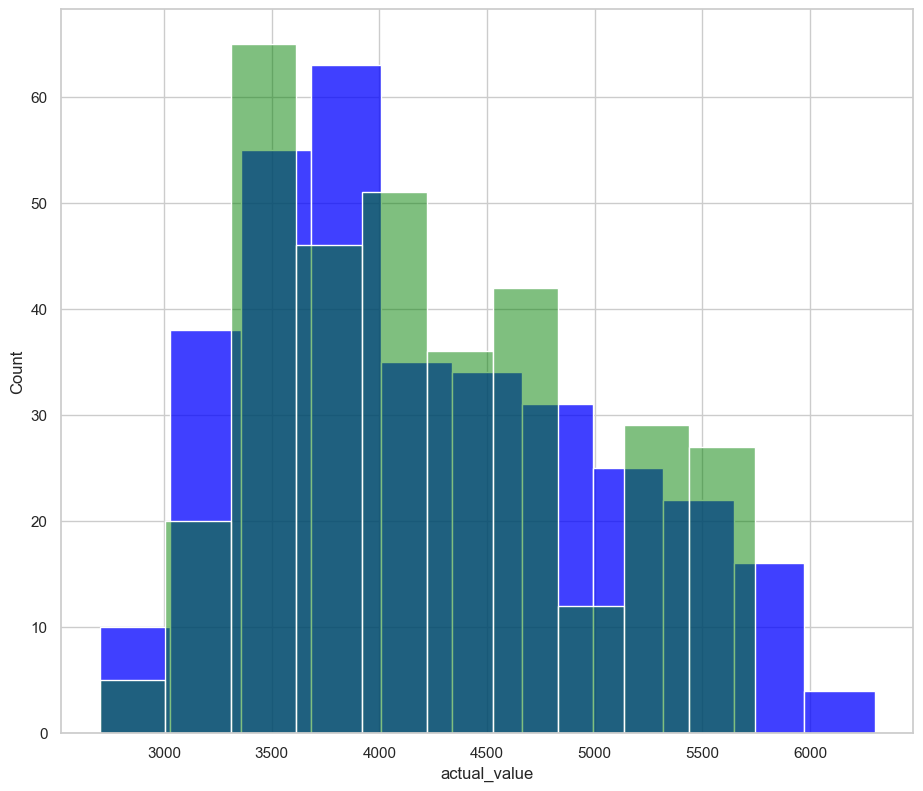

In [18]:
# Valores reales
sns.histplot(
    data = resultado_modelos,
    x='actual_value',
    color = 'blue'
)

#Modelo 1
sns.histplot(
    data = resultado_modelos,
    x='prediction_model4',
    color = 'green',
    alpha = 0.5
)


### Comparación 5

<AxesSubplot: xlabel='actual_value', ylabel='Count'>

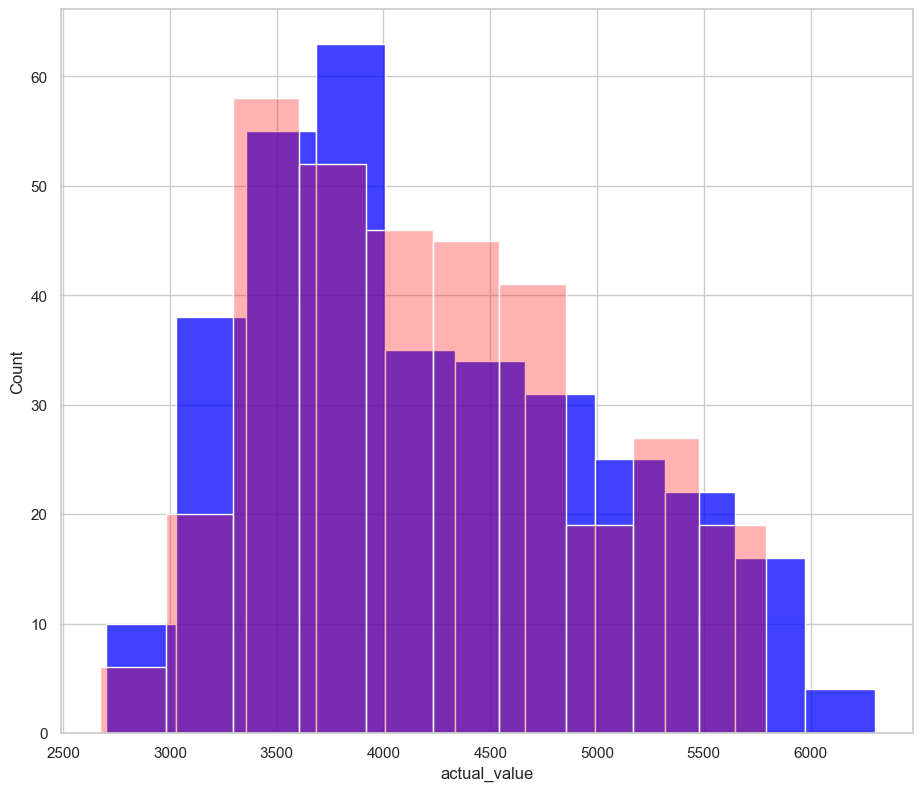

In [21]:
# Valores reales
sns.histplot(
    data = resultado_modelos,
    x='actual_value',
    color = 'blue'
)

#Modelo 1
sns.histplot(
    data = resultado_modelos,
    x='prediction_model5',
    color = 'red',
    alpha = 0.3
)


Como se puede observar los modelos se comportan de manera similar, incluso más que los anteriores 4.

Ya estamos comparándolo de manera visual.

### ECDF
Estas funciones sirven para analizar multiples variables. Entonces ocupemos este tipo de análisis.

<AxesSubplot: ylabel='Proportion'>

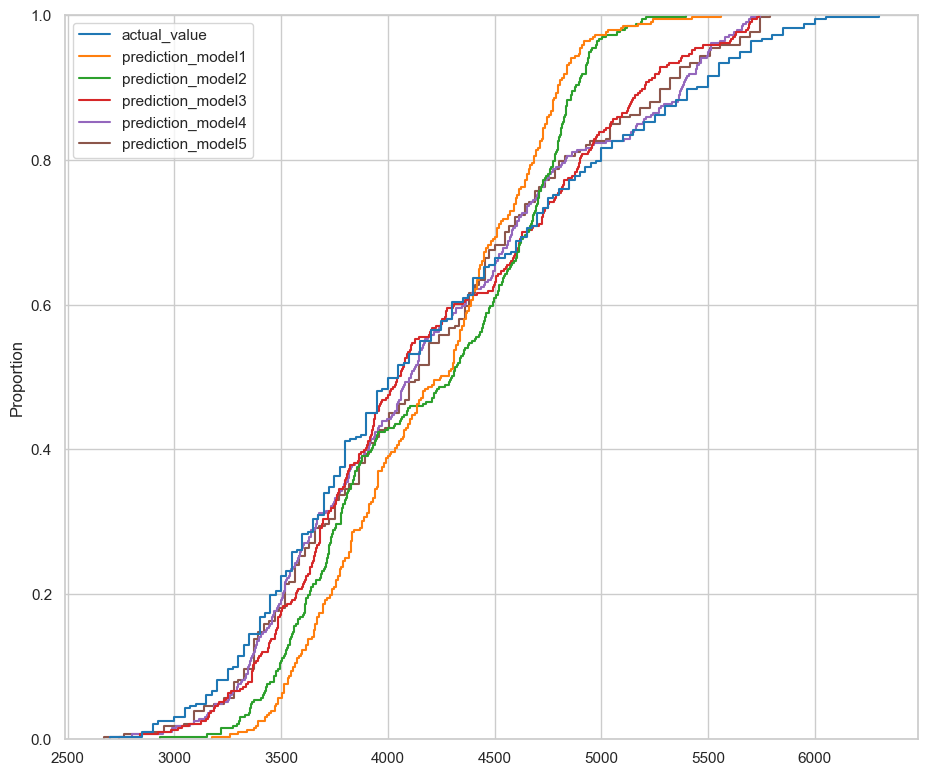

In [22]:
sns.ecdfplot(
    data=resultado_modelos
)

Tenemos la linea azul que muestra mis valores reales, el resto son valores de los modelos.

En general estas lineas muestran las distribuciones acumuladas para nuestros modelos. En general todas las variables son pesos de pingüinos.

Entonces podemos decir que las lineas que estén más cercas a nuestros pingüinos son las que mas se acercaron a ese valor real. 

IMPORTANTE: A veces se consideran ciertas cuestiones para que no estemos haciendo overfitting a nuestro modelo.

Pero cuando hacemos la comparación con varios modelo, podemos hacer comparación individual de datos reales y del modelo entrenado.

#### Modelo 1

<AxesSubplot: ylabel='Proportion'>

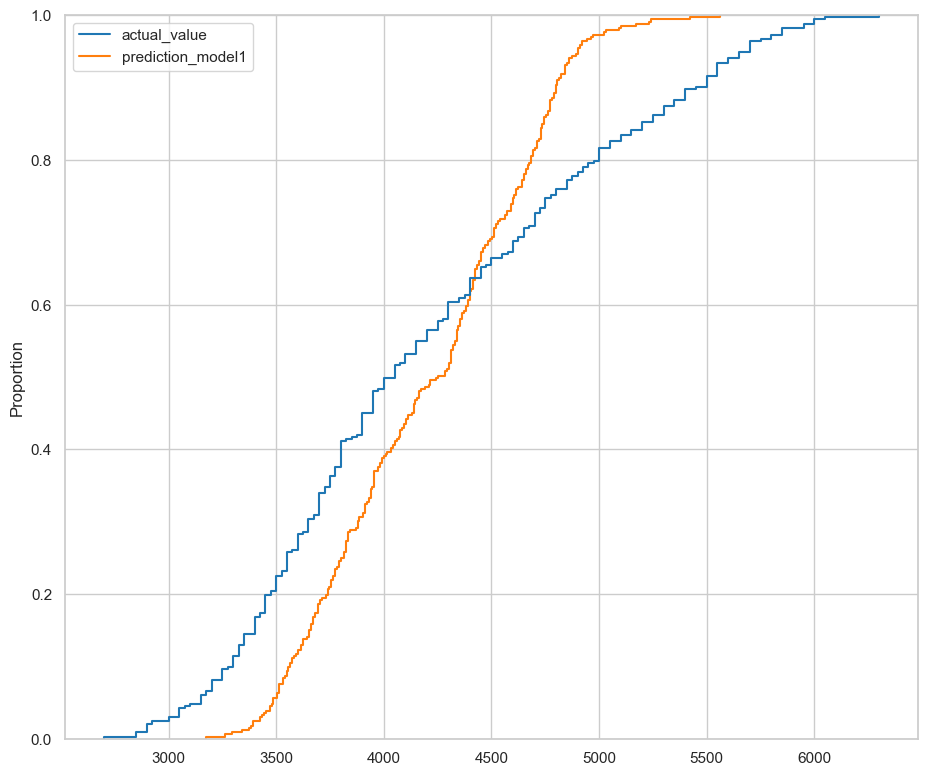

In [23]:
sns.ecdfplot(
    data=resultado_modelos.select_columns(['actual_value','prediction_model1'])
)

#### Modelo 2

<AxesSubplot: ylabel='Proportion'>

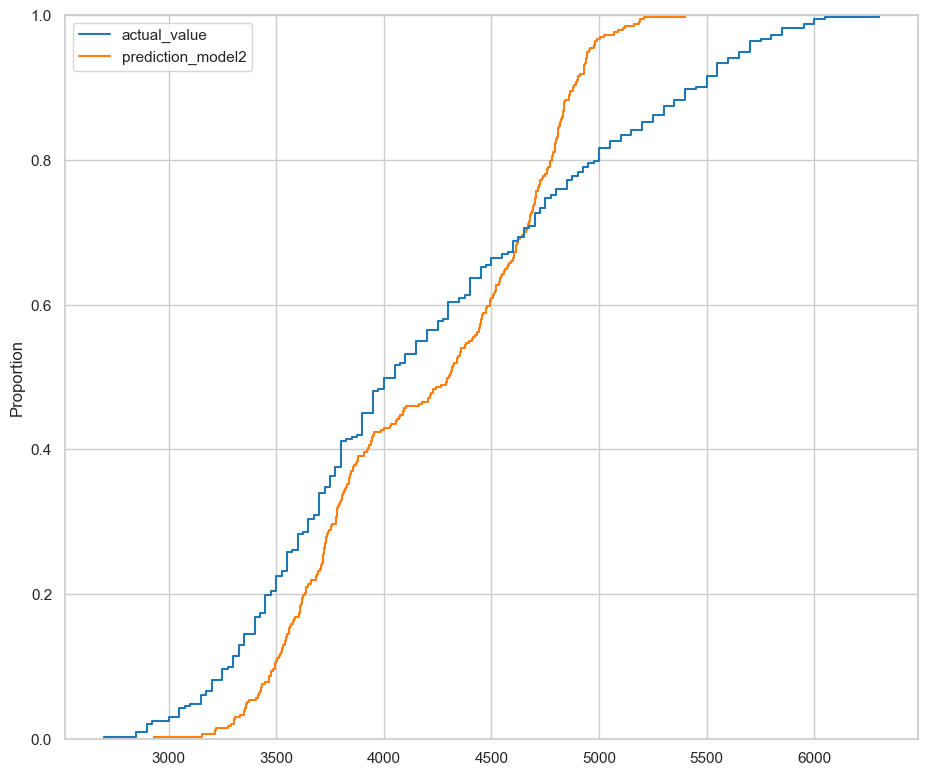

In [24]:
sns.ecdfplot(
    data=resultado_modelos.select_columns(['actual_value','prediction_model2'])
)

#### Modelo 3

<AxesSubplot: ylabel='Proportion'>

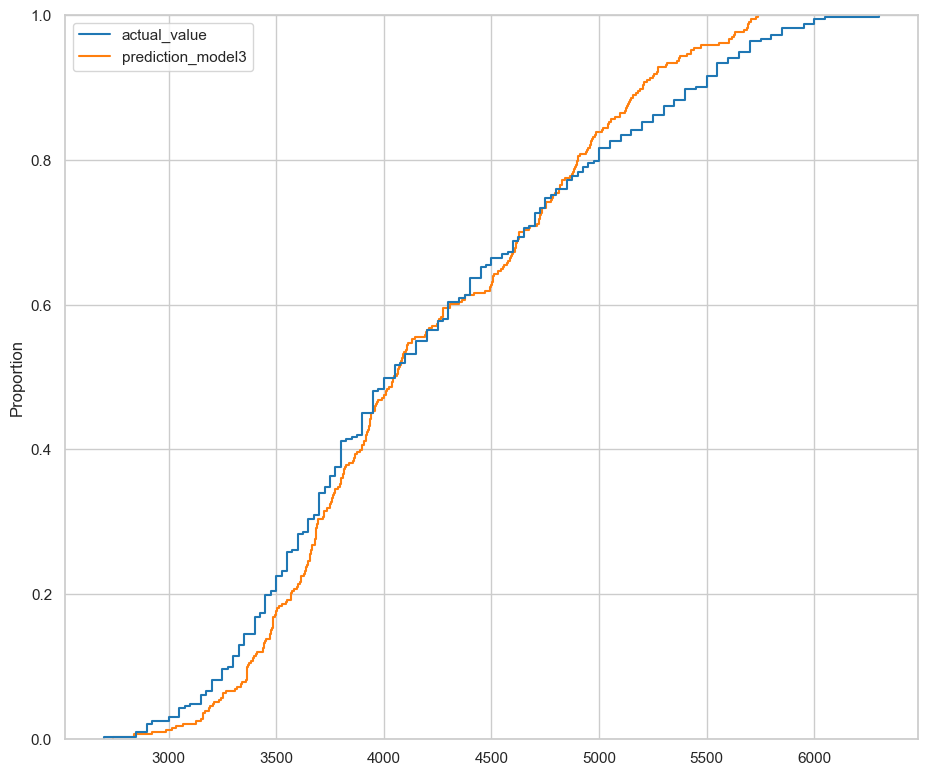

In [25]:
sns.ecdfplot(
    data=resultado_modelos.select_columns(['actual_value','prediction_model3'])
)

#### Modelo 4

<AxesSubplot: ylabel='Proportion'>

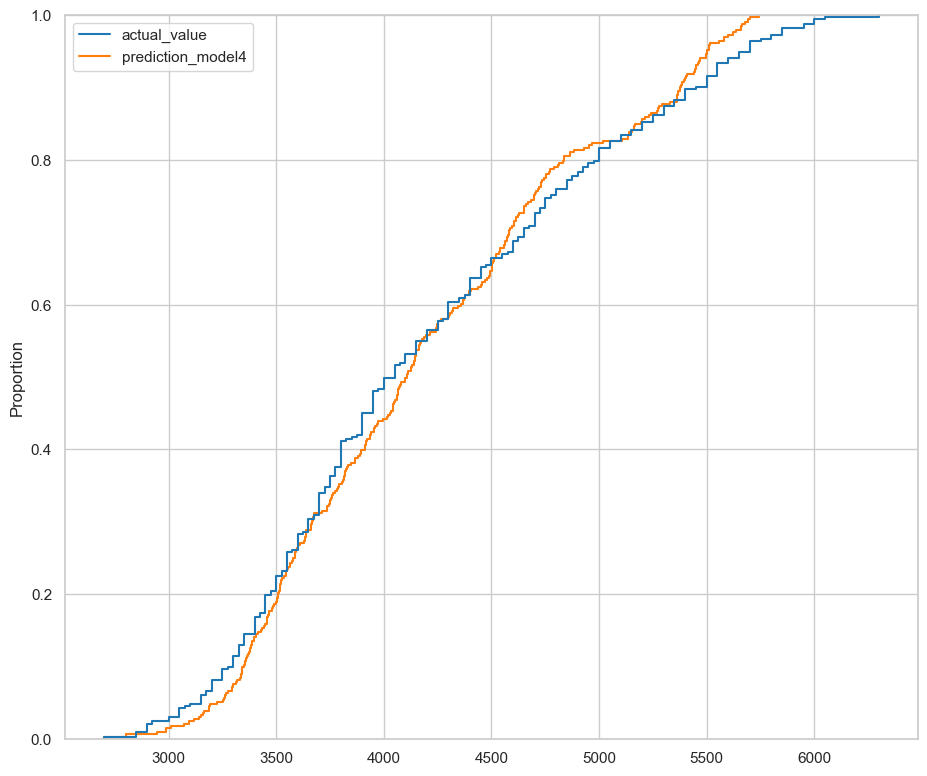

In [26]:
sns.ecdfplot(
    data=resultado_modelos.select_columns(['actual_value','prediction_model4'])
)

#### Modelo 5

<AxesSubplot: ylabel='Proportion'>

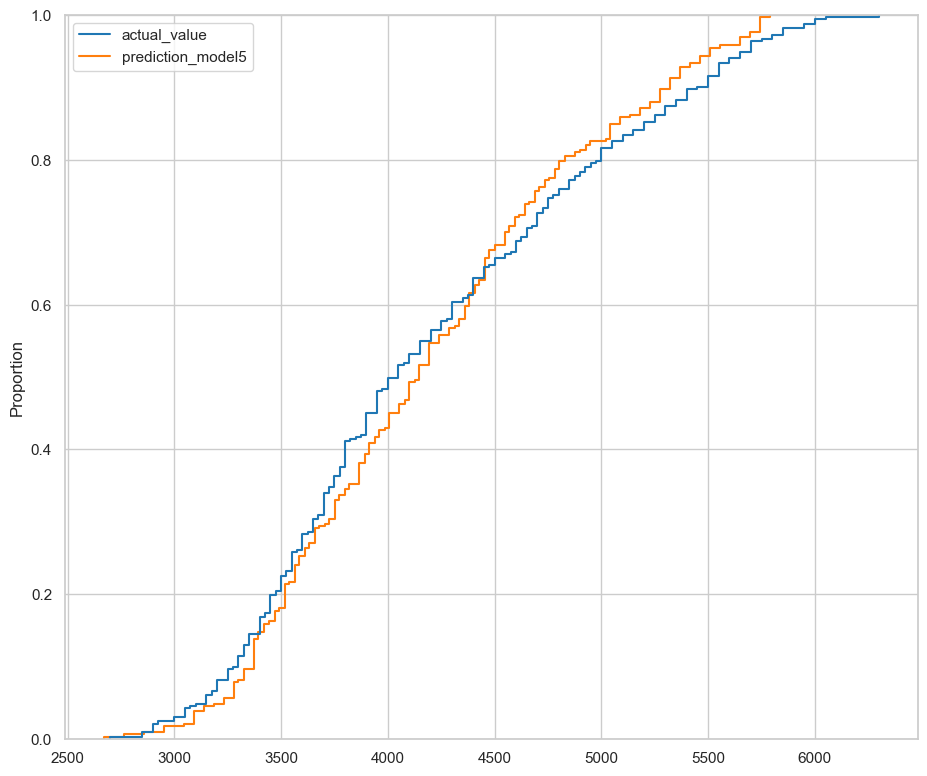

In [27]:
sns.ecdfplot(
    data=resultado_modelos.select_columns(['actual_value','prediction_model5'])
)

Como se puede observar, algunas partes del modelo estoy prediciendo por debajo de lo que en realidad es, en otras existe un valor por encima de lo verdadero.

Otra manera de ver multiples distribuciones es a traves de observar sus densidades y ocuparemos la función PDF.

### PDF

<AxesSubplot: ylabel='Density'>

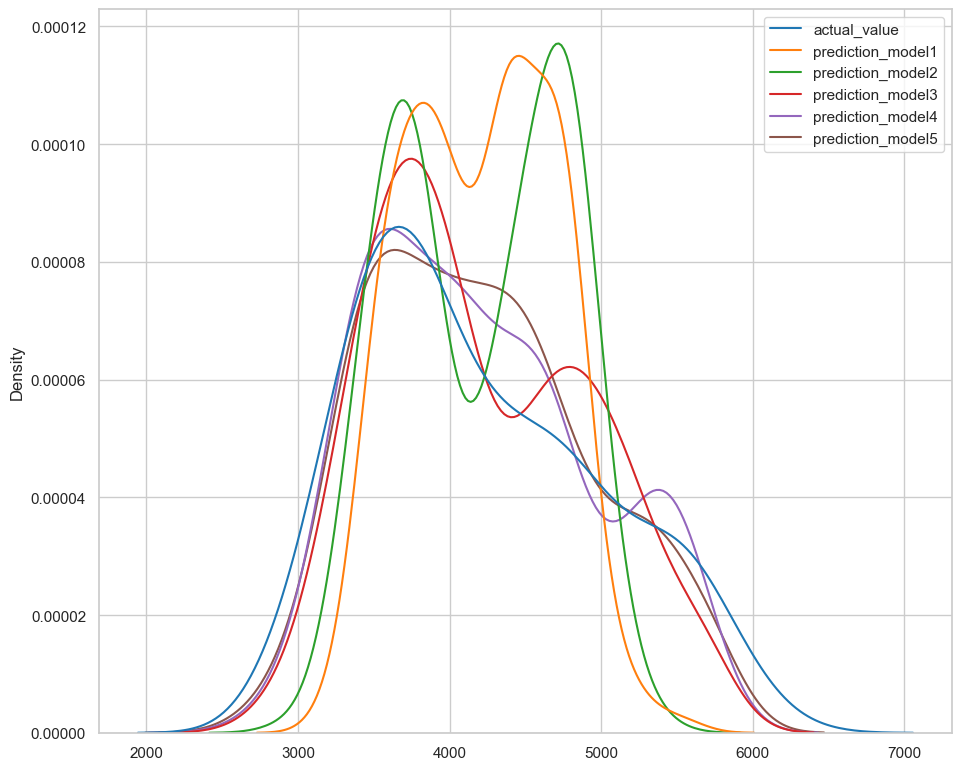

In [28]:
sns.kdeplot(
    resultado_modelos
)

Podemos ver el comportamiento de nuestros datos reales vs modelos. Como se puede observar tienen otro tipo de comportamiento.

#### Modelo 1

<AxesSubplot: ylabel='Density'>

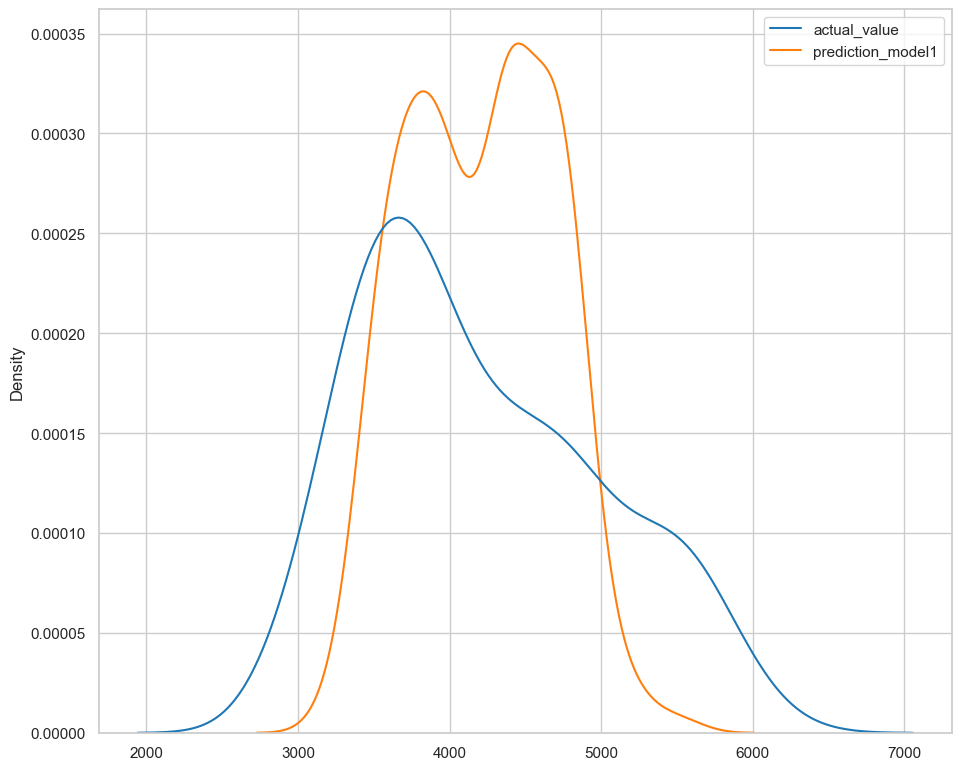

In [29]:
sns.kdeplot(
    resultado_modelos.select_columns(['actual_value','prediction_model1'])
)

#### Modelo 2

<AxesSubplot: ylabel='Density'>

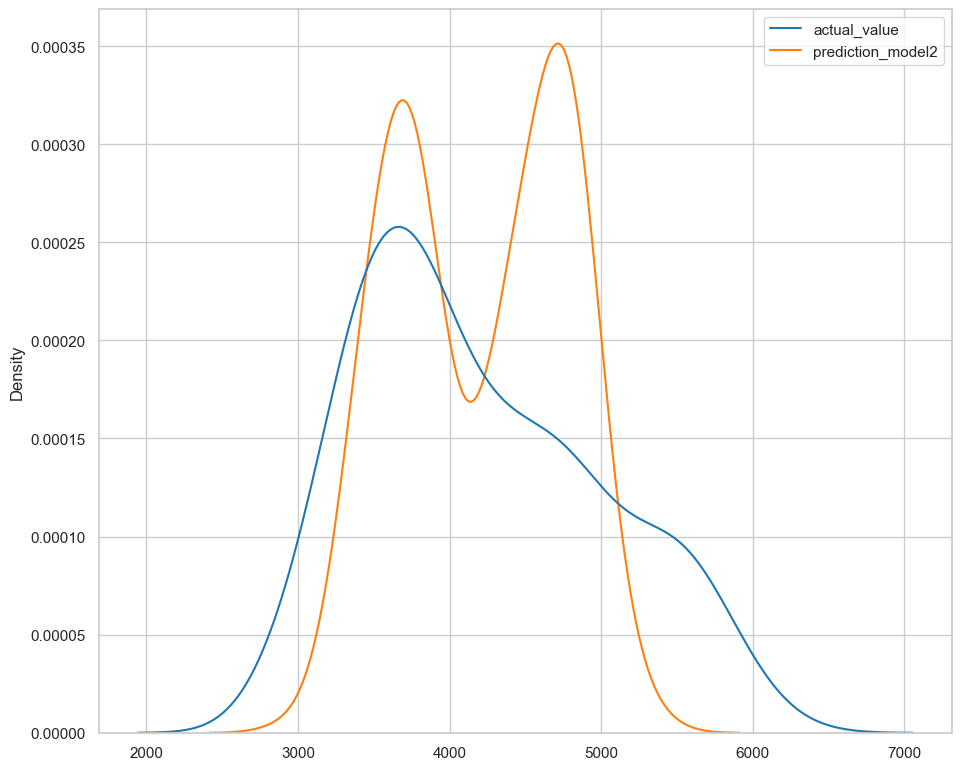

In [30]:
sns.kdeplot(
    resultado_modelos.select_columns(['actual_value','prediction_model2'])
)

#### Modelo 3

<AxesSubplot: ylabel='Density'>

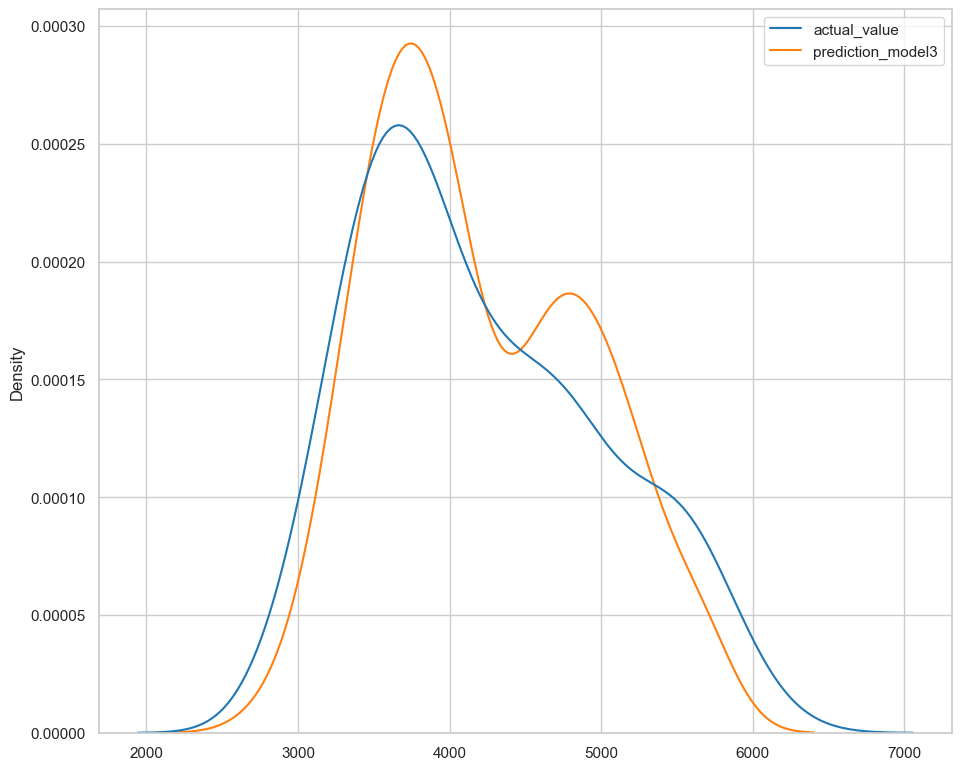

In [31]:
sns.kdeplot(
    resultado_modelos.select_columns(['actual_value','prediction_model3'])
)

#### Modelo 4

<AxesSubplot: ylabel='Density'>

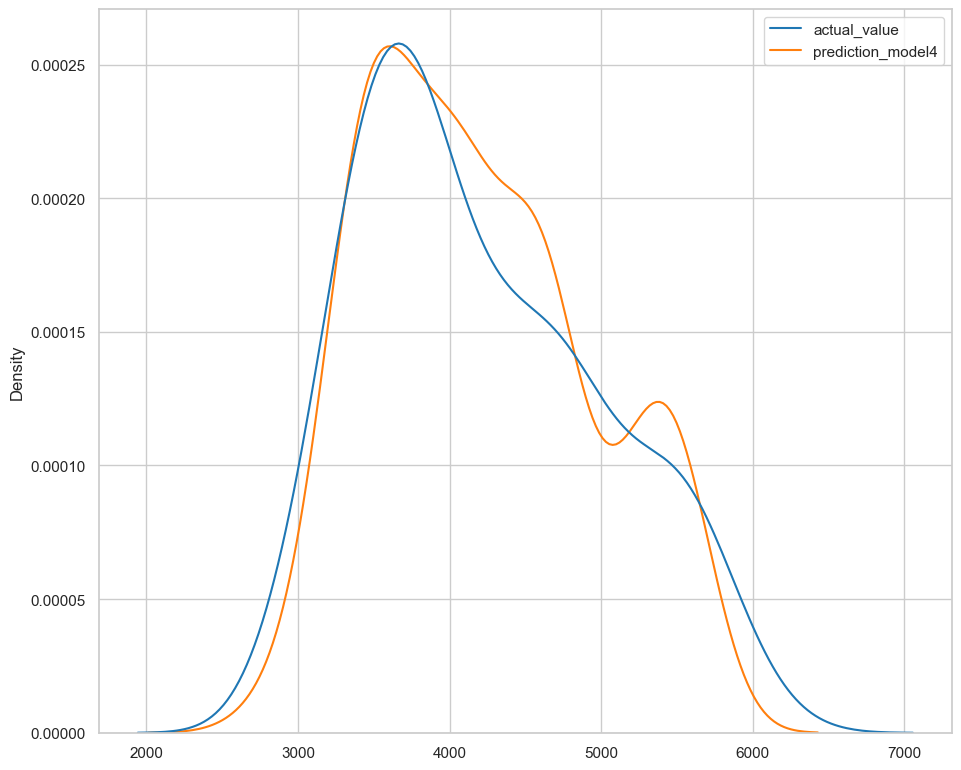

In [32]:
sns.kdeplot(
    resultado_modelos.select_columns(['actual_value','prediction_model4'])
)

#### Modelo 5

<AxesSubplot: ylabel='Density'>

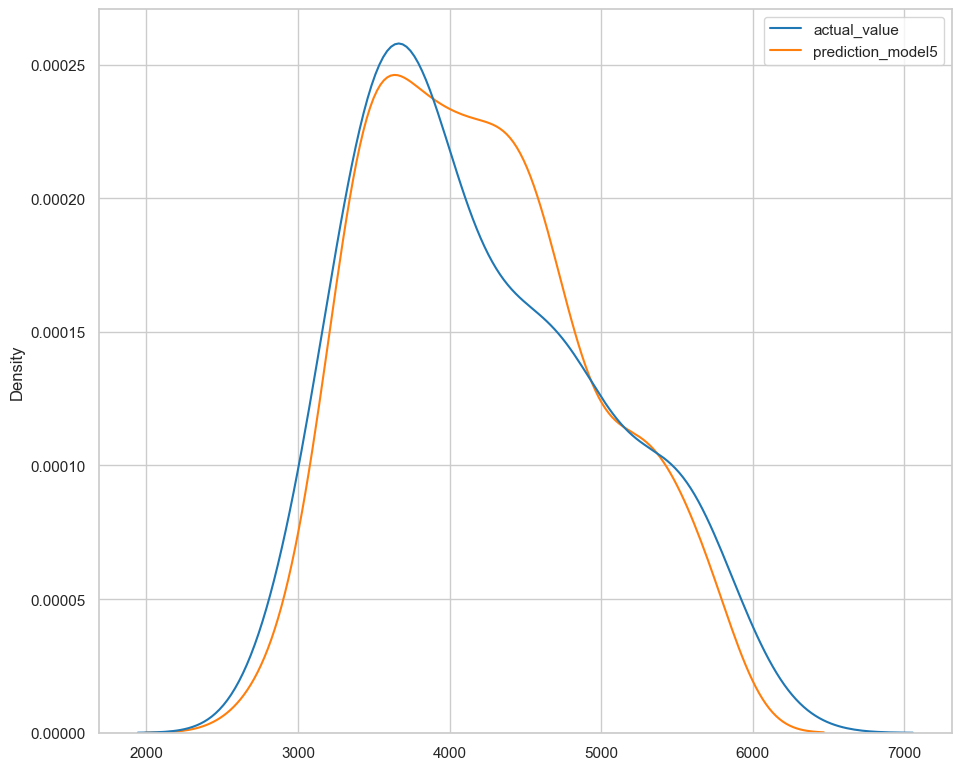

In [33]:
sns.kdeplot(
    resultado_modelos.select_columns(['actual_value','prediction_model5'])
)

Como se puede observar en el comportamiento del modelo, existen zonas en las que está por debajo y otras zonas en las que está por encima de los valores reales. Entonces cobra sentido cuando se hace la predicción de que en ciertos valores sean diferentes (mayores o menores)

### Acumulado

#### Modelo 5

<AxesSubplot: ylabel='Density'>

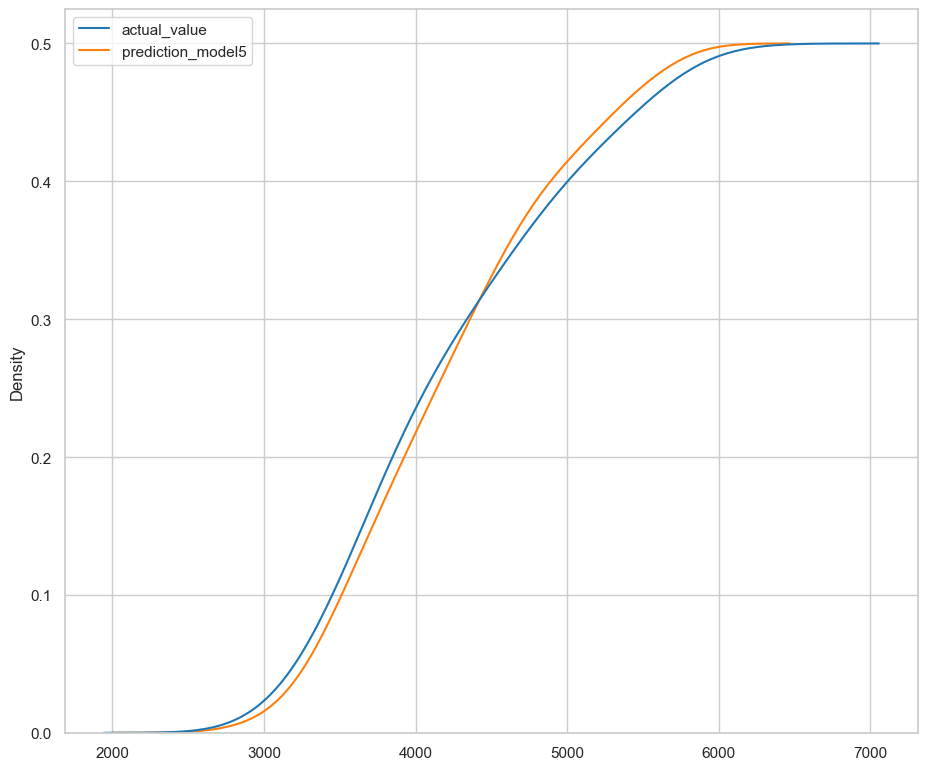

In [35]:
sns.kdeplot(
    resultado_modelos.select_columns(['actual_value','prediction_model5']),
    cumulative=True
)

Aquí me muestra como se podrian comportar mis datos reales, entre mayor variacion exista, los datos se comportaran de diferente manera.

## ¿Qué encontramos con hacer los modelos?

Recordemos que el modelo 5, fue cuando solo utilizamos 2 variables y con solo 2 variables nos pudimos acercar de forma considerable a los valores reales de la variable **body_mass_g**.

Entonces nos lleva a replantearnos si debimos explorar mas a fondo nuestras variables. Nosotros seguimos un flujo de explorar 1 variable, 2 variables y multiples pero desde un comienzo pudimos haber explorado multiples variables y después realizar nuestro modelo, dependiendo de las cuestiones de interés.


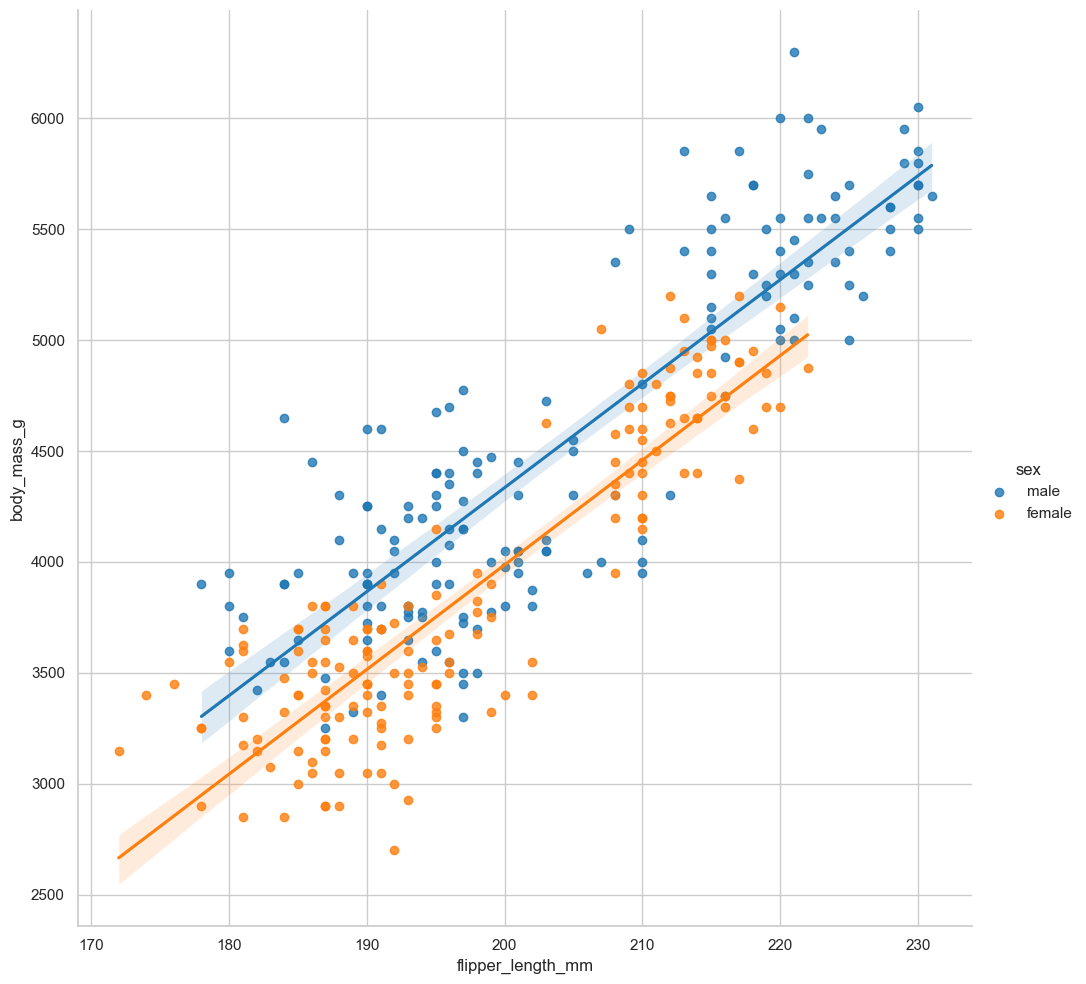

In [36]:
sns.lmplot(
    data=preprocessed_penguins_df,
    x = 'flipper_length_mm',
    y = 'body_mass_g',
    hue='sex',
    height=10
)

**¿Qué estamos viendo?**     
        
Estamos viendo que por lo general los machos pesan más que las hembras. Nosotros también podriamos verlo a traves de un box plot. Pero para el analisis que estamos realizando es conveniente en forma de lineas. También otra cuestion importante es que; nosotros al agregar la variable 'sexo' podemos segmentar de forma más precisa los datos.

Entonces si en un principio hubiesemos pasado por esta parte, esta información nos hubiera ayudado de manera considerable para poder obtener una mejor forma de abordar el tema. Y lo que se transforma en tiempo ahorrado.

La magia de explorar nos ahorrará demasiado tiempo, lo que se convierte en la importancia de visualizar los datos antes de convertirlos en modelos. Al encontrar asociaciones visualmente que ya destacan ciertas características, en este caso; las poblaciones de pingüinos se destacaban cuando las dividíamos por sexo.

Podemos continuar este proceso y ahora en lugar de segmentar por sexo, ahora podríamos añadir una nueva variable, es decir segmentar por **Isla** o por **especie**, así de esta forma combinas distinta información y se pueden dividir los datos de una forma más óptima, para tratar de encontrar la manera en la cual podemos recrear un valor de interés, entonces explorar será una herramienta fundamental.